In [3]:
#importing the essential libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [4]:
train_set="C:/Users/jpsha/Documents/capstone/datasets/4_endoscopy/etrain"
val_set="C:/Users/jpsha/Documents/capstone/datasets/4_endoscopy/eval"
test_set="C:/Users/jpsha/Documents/capstone/datasets/4_endoscopy/etest"

In [5]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=True,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')

Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [7]:
train_generator.class_indices

{'0_normal': 0, '1_ulcerative_colitis': 1, '2_polyps': 2, '3_esophagitis': 3}

In [8]:
from tensorflow.keras import regularizers
from keras.regularizers import l2

base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
#model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(GaussianNoise(0.35))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.35))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 1408)       0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                        

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=20, #steps_per_epoch= training_images/batch_size= 3200/32<=200
    epochs = 20, #own choice
    validation_data = validation_generator
)

Epoch 1/20
20/20 [==============================] - 127s 6s/step - loss: 0.6574 - accuracy: 0.7531 - precision: 0.7723 - recall: 0.7312 - auc: 0.9375 - val_loss: 0.4840 - val_accuracy: 0.8260 - val_precision: 0.8842 - val_recall: 0.7485 - val_auc: 0.9640
Epoch 2/20
20/20 [==============================] - 122s 6s/step - loss: 0.2521 - accuracy: 0.8906 - precision: 0.8931 - recall: 0.8875 - auc: 0.9884 - val_loss: 0.3324 - val_accuracy: 0.8935 - val_precision: 0.9290 - val_recall: 0.8505 - val_auc: 0.9846
Epoch 3/20
20/20 [==============================] - 123s 6s/step - loss: 0.2734 - accuracy: 0.9062 - precision: 0.9088 - recall: 0.9031 - auc: 0.9855 - val_loss: 0.3279 - val_accuracy: 0.8835 - val_precision: 0.9196 - val_recall: 0.8465 - val_auc: 0.9838
Epoch 4/20
20/20 [==============================] - 125s 6s/step - loss: 0.2007 - accuracy: 0.9406 - precision: 0.9429 - recall: 0.9281 - auc: 0.9913 - val_loss: 0.2985 - val_accuracy: 0.8970 - val_precision: 0.9199 - val_recall: 0.873

In [11]:
model.evaluate(train_generator)

200/200 [==============================] - 180s 897ms/step - loss: 0.0674 - accuracy: 0.9756 - precision: 0.9768 - recall: 0.9753 - auc: 0.9986


[0.06739456951618195,
 0.9756249785423279,
 0.9768388271331787,
 0.9753124713897705,
 0.99858558177948]

In [12]:
model.evaluate(validation_generator)

125/125 [==============================] - 112s 895ms/step - loss: 0.4180 - accuracy: 0.8640 - precision: 0.8705 - recall: 0.8570 - auc: 0.9753


[0.41800034046173096,
 0.8640000224113464,
 0.8704926371574402,
 0.8569999933242798,
 0.9753184914588928]

In [13]:
model.evaluate(test_generator)

50/50 [==============================] - 45s 885ms/step - loss: 0.3407 - accuracy: 0.8700 - precision: 0.8763 - recall: 0.8675 - auc: 0.9828


[0.34071993827819824,
 0.8700000047683716,
 0.8762626051902771,
 0.8675000071525574,
 0.9828380942344666]

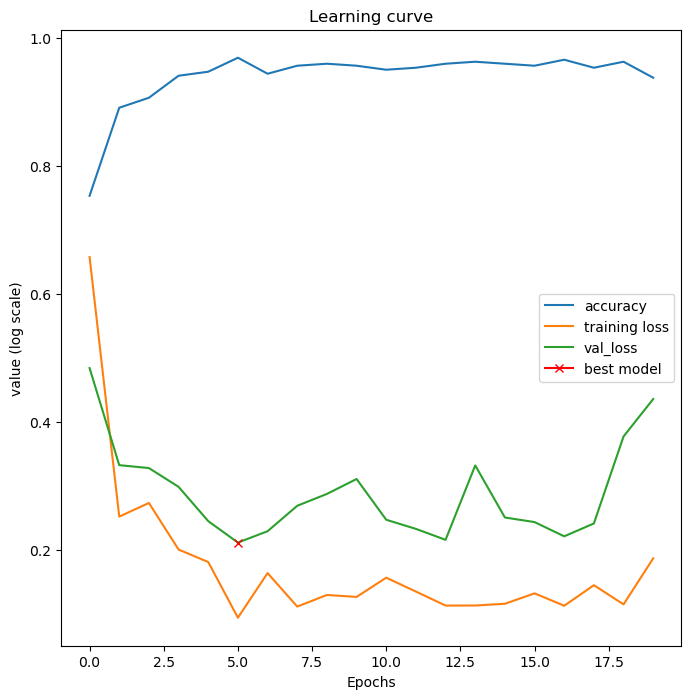

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

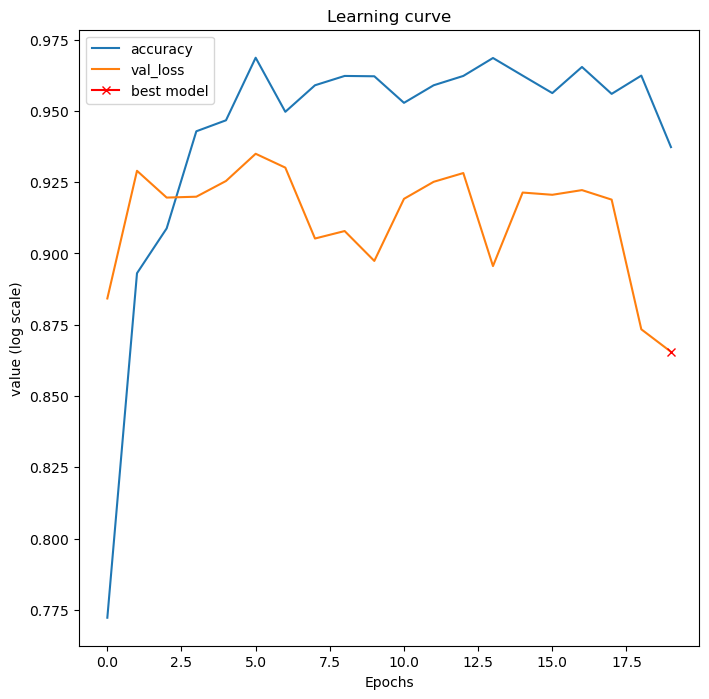

In [15]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["precision"], label="accuracy")
plt.plot(history.history["val_precision"], label="val_loss")
plt.plot( np.argmin(history.history["val_precision"]), np.min(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

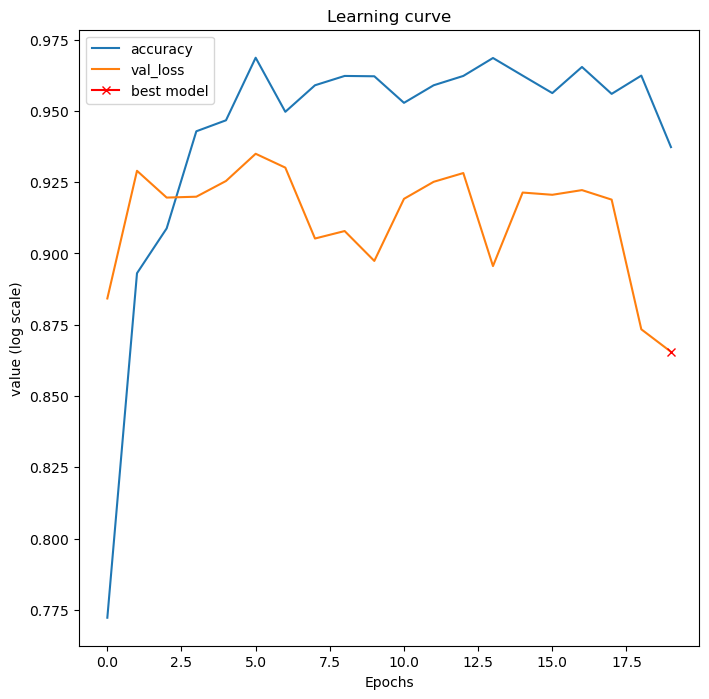

In [16]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["precision"], label="accuracy")
plt.plot(history.history["val_precision"], label="val_loss")
plt.plot( np.argmin(history.history["val_precision"]), np.min(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

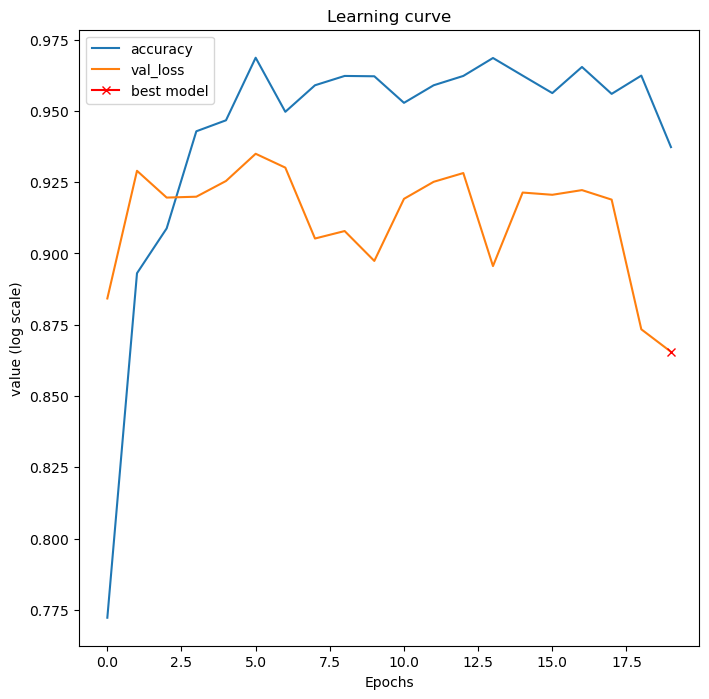

In [17]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["precision"], label="accuracy")
plt.plot(history.history["val_precision"], label="val_loss")
plt.plot( np.argmin(history.history["val_precision"]), np.min(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

In [18]:
import keras.utils as image
img = image.load_img("C:/Users/jpsha/Documents/capstone/etest/3_esophagitis/test_esophagitis_ (33).jpg",target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="Normal"
elif a==1:
    op="Ulcerative colitis"
elif a==2:
    op="Polyp"
else:
    op="Esophagitis"  

plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))  

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jpsha/Documents/capstone/etest/3_esophagitis/test_esophagitis_ (33).jpg'